In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.9903846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.96      0.98        47

    accuracy                           0.99       208
   macro avg       0.99      0.98      0.99       208
weighted avg       0.99      0.99      0.99       208



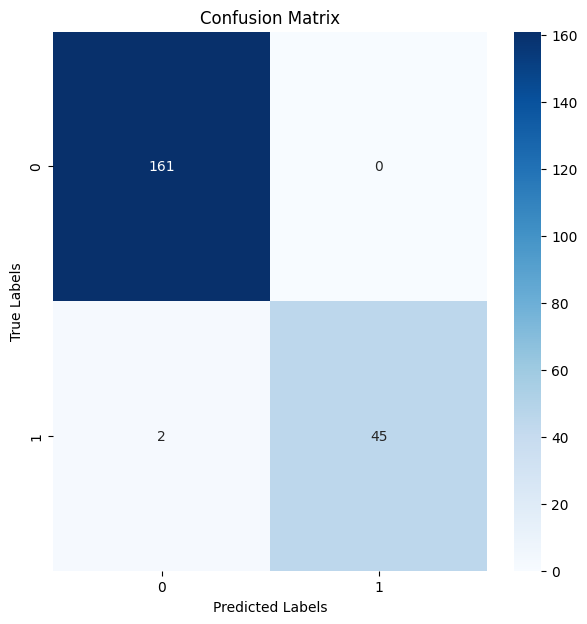

In [6]:
# Load the dataset
data = pd.read_csv('../Dataset/dataset_final.csv')

# Drop unnecessary columns
data = data.drop(['patient_id', 'window_period', 'Sleep_Agitation', 'Physio_Agitation'], axis=1)

# Separate features and target
X = data.drop('Agitation', axis=1)
y = data['Agitation']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()